In [1]:
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df_listings_final = pds.read_csv("https://storage.googleapis.com/h3-data/listings_final.csv", sep=";")
df_price_availability = pds.read_csv("https://storage.googleapis.com/h3-data/price_availability.csv", sep=";")

In [3]:
df_listings_final.head()

,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90


In [4]:
df_price_availability.head()

,listing_id,day,created,available,local_currency,local_price,min_nights
0,9810829,2018-12-08,2018-09-27 06:14:10.000+0000,True,EUR,160,1
1,9810829,2018-12-08,2018-09-26 19:34:02.000+0000,True,EUR,160,1
2,20897010,2018-12-09,2018-09-27 10:38:57.000+0000,True,EUR,172,2
3,20897010,2018-12-09,2018-09-27 06:10:27.000+0000,True,EUR,172,2
4,20897010,2018-12-09,2018-09-26 19:30:25.000+0000,True,EUR,172,2


In [5]:
df_merge = pds.merge(df_price_availability.groupby('listing_id')['local_price'].mean(), df_listings_final, on='listing_id')

In [6]:
df_merge.head()

,listing_id,local_price,Unnamed: 0,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,56093,170.000000,12,Beau duplex dans le Marais,entire_home,Paris,3e arrondissement,48.867284,2.358431,4,2,1,1.0,False,False,True,True,False,0.88,1.0
1,57207,49.952756,13,Belle Chambre pour court,private_room,Paris,Vaugirard,48.846184,2.304455,2,1,1,1.0,False,False,True,False,False,0.87,1.0
2,114543,107.374026,19,Charming 1bdr 55m² - Eiffel Tower,entire_home,Paris,NaN,48.849530,2.290219,2,1,1,1.0,False,False,True,True,False,0.90,0.9
3,149534,169.000000,9,GREAT WARM FULL APT LE HAUT MARAIS,entire_home,Paris,NaN,48.866360,2.361844,4,2,1,1.0,False,False,True,True,False,1.00,0.4
4,164255,75.876209,28,Perfect place in Le Marais - Paris,entire_home,Paris,3e arrondissement,48.861398,2.364299,4,2,1,1.0,False,False,True,False,False,1.00,1.0


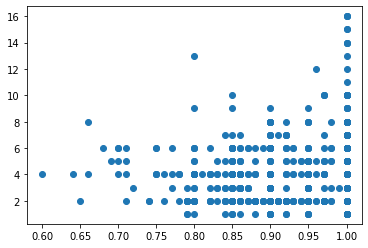

In [8]:
plt.scatter(df_merge["pricing_weekly_factor"], df_merge["person_capacity"])